# Spotify Data Analysis Notebook
## By Abdullah Hasan

## Introduction

This notebook aims to provide visualization graphs of the **Spotify Data**, which was downloaded from [here](https://github.com/rfordatascience/tidytuesday/tree/master/data/2020/2020-01-21). This notebook is part of the Udacity Data Analysis Advanced Nanodegree, Project 3 requirement.

Data is detail heavy, therefore for the sake of simplicity and unneeded complexity, we will analyze them YEARLY only.

## Required Libraries and helper functions

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [ ]:
# A function to plot our graphs
# For standarization purposes
def spotify_data_plot_function(df_to_plot, kind_to_plot=None, x_axisL=None, y_axisL=None, titleL=None):
    df_to_plot.plot(kind=kind_to_plot, figsize=(16,8))
    plt.xticks(fontsize=18)
    plt.xlabel(x_axisL, fontsize=20)
    plt.ylabel(y_axisL, fontsize=20)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=12)
    plt.title(titleL, fontsize=20);
    

## Data Preprocessing

### Data loading and Preparation

In [ ]:
# Read the original csv file using pandas
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'
spotify_data = pd.read_csv(url, parse_dates=True)

In [ ]:
# View the first 5 rows for an overall idea of the file
spotify_data.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
# View the column names, data shape, data types and if missing values exist
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
# Check for duplications
spotify_data.duplicated().sum()

0

**Preliminary Ideas**

1. 'track_album_release_date' column doesn't have a 'datetime' data type, rather an 'object'
2. (5) Missing Values exist in 'track_name', 'track_artist', track_album_name'

In [ ]:
# As the missing values are only 5, we can neglect such rows and drop them
spotify_data.dropna(inplace=True)

In [ ]:
# Add a column containing YEAR dates only, will used for future analysis
spotify_data['track_album_release_date_year'] = pd.to_datetime(spotify_data['track_album_release_date']).dt.to_period('Y')

# Exploratory Data Phase

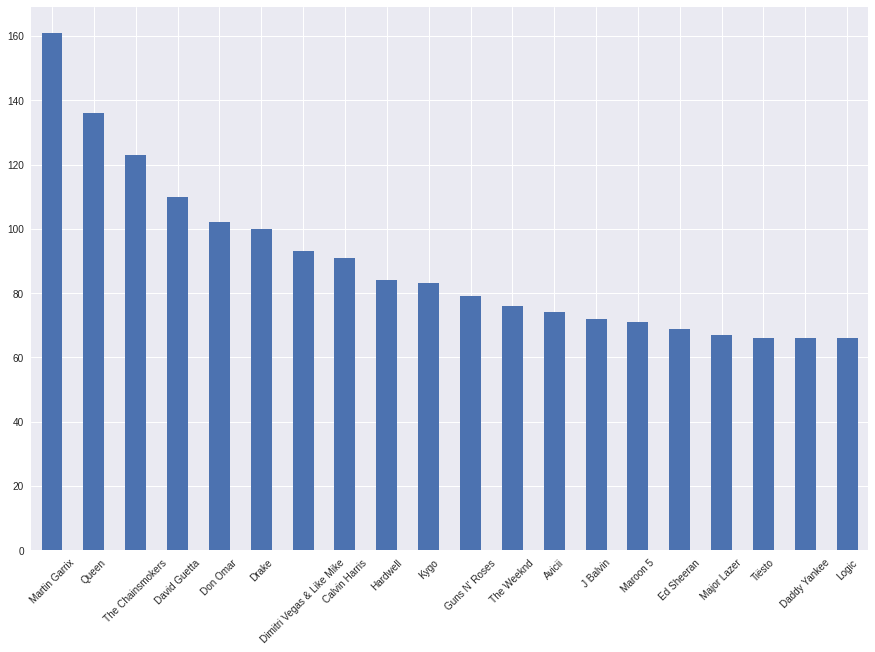

In [ ]:
# Checking how's the difference in names among artist
spotify_data['track_artist'].value_counts()[:20].plot(kind='bar', figsize=(15,10))
plt.xticks(rotation=45);

'Martin Garrix' and 'David Guetta' as well as others appear on top, these are rather DJs who produce song covers rather than new songs, so this data must contain a lot of covers/remixes

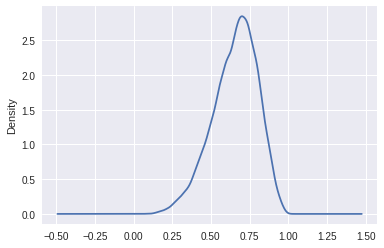

In [21]:
# Check if the data is biased towards a single song characteristic like danceability, aka Club songs
spotify_data['danceability'].plot(kind='kde')

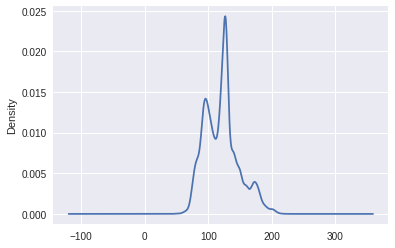

In [ ]:
spotify_data['tempo'].plot(kind='kde')

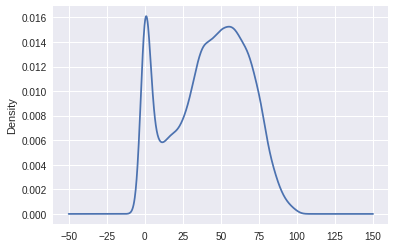

In [ ]:
# Visualizing the distribution of the 'track_popularity' variable, it apears bimodal
spotify_data['track_popularity'].plot(kind='kde')

In [ ]:
# Check the factors most affecting song popularity
spotify_data_corr = spotify_data.corr()
spotify_data_corr

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_popularity,1.000000,0.064754,-0.108984,-0.000405,0.057717,0.010553,0.007067,0.085042,-0.150003,-0.054593,0.033278,-0.005538,-0.143634
danceability,0.064754,1.000000,-0.086074,0.011771,0.025351,-0.058711,0.181808,-0.024515,-0.008658,-0.123899,0.330538,-0.184132,-0.096922
energy,-0.108984,-0.086074,1.000000,0.009972,0.676662,-0.004778,-0.032184,-0.539732,0.033282,0.161317,0.151050,0.150072,0.012560
key,-0.000405,0.011771,0.009972,1.000000,0.000920,-0.173981,0.022462,0.004378,0.006022,0.002834,0.019933,-0.013316,0.015141
loudness,0.057717,0.025351,0.676662,0.000920,1.000000,-0.019242,0.010313,-0.361646,-0.147823,0.077589,0.053411,0.093761,-0.115039
mode,0.010553,-0.058711,-0.004778,-0.173981,-0.019242,1.000000,-0.063446,0.009399,-0.006760,-0.005485,0.002567,0.014339,0.015576
speechiness,0.007067,0.181808,-0.032184,0.022462,0.010313,-0.063446,1.000000,0.026168,-0.103385,0.055337,0.064756,0.044649,-0.089432
acousticness,0.085042,-0.024515,-0.539732,0.004378,-0.361646,0.009399,0.026168,1.000000,-0.006881,-0.077247,-0.016833,-0.112782,-0.081553
instrumentalness,-0.150003,-0.008658,0.033282,0.006022,-0.147823,-0.006760,-0.103385,-0.006881,1.000000,-0.005505,-0.175406,0.023303,0.063256
liveness,-0.054593,-0.123899,0.161317,0.002834,0.077589,-0.005485,0.055337,-0.077247,-0.005505,1.000000,-0.020432,0.020887,0.006197


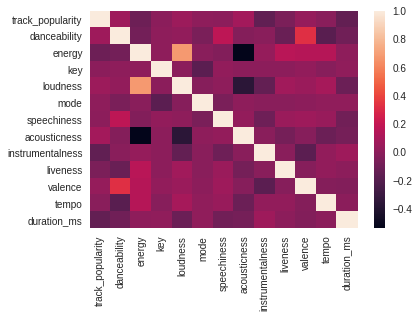

In [ ]:
# Heat Map of the
sns.heatmap(spotify_data_corr)

In [22]:
# Select the song characteristic values for a distribution plot
# View a complete overview of every feature distribution
song_chartcs_dist = spotify_data.iloc[:, 11:-1]
sns.pairplot(song_chartcs_dist)

Output hidden; open in https://colab.research.google.com to view.

We can see that 'danceability' and 'acousticness' increase as the song's popularity increases

# Explanatory Data Phase

### What is the average popularity of each of the genres over the last decade?

In [23]:
# Select from 2020-2010 only for simplicity
genre_popularity = spotify_data[(spotify_data['track_album_release_date_year'] >= '2010-1-1') & (spotify_data['track_album_release_date_year'] <= '2020-1-1')]
genre_popularity = genre_popularity.groupby(['track_album_release_date_year', 'playlist_genre'])['track_popularity'].mean()

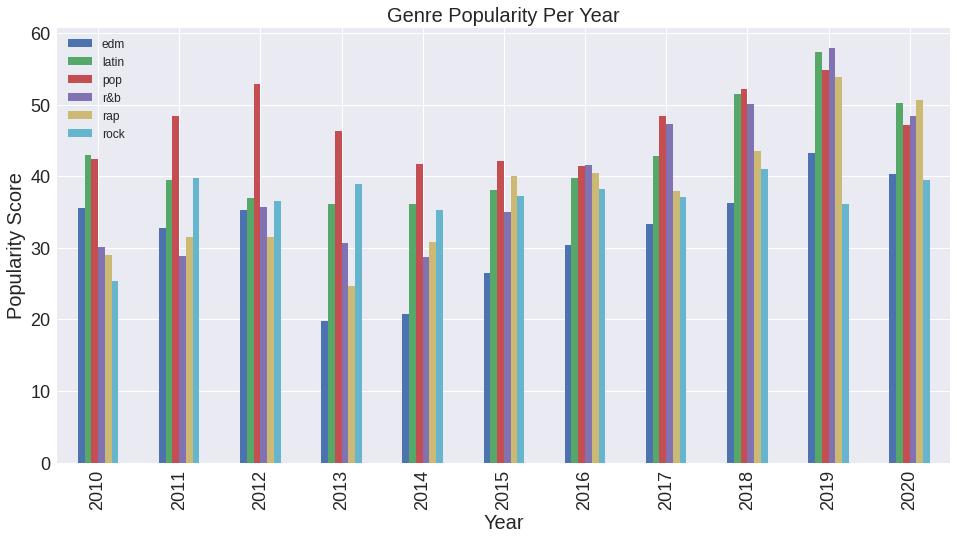

In [24]:
# Plotting using the custom made plot function created in the first section
spotify_data_plot_function(genre_popularity.unstack(), 'bar', "Year", "Popularity Score", "Genre Popularity Per Year")

### How has the characteristics of a song changed over the last 5 decades?

In [25]:
# Select only the last 50 years
song_chartcs = spotify_data[(spotify_data['track_album_release_date_year'] >= '1970-1-1') &
                            (spotify_data['track_album_release_date_year'] <= '2020-1-1')]

# Calculate the mean values for each song characteristic, then group by each year
song_chartcs = song_chartcs[['danceability','energy','liveness','acousticness', 'valence',
                             'track_album_release_date_year']].groupby('track_album_release_date_year').mean()

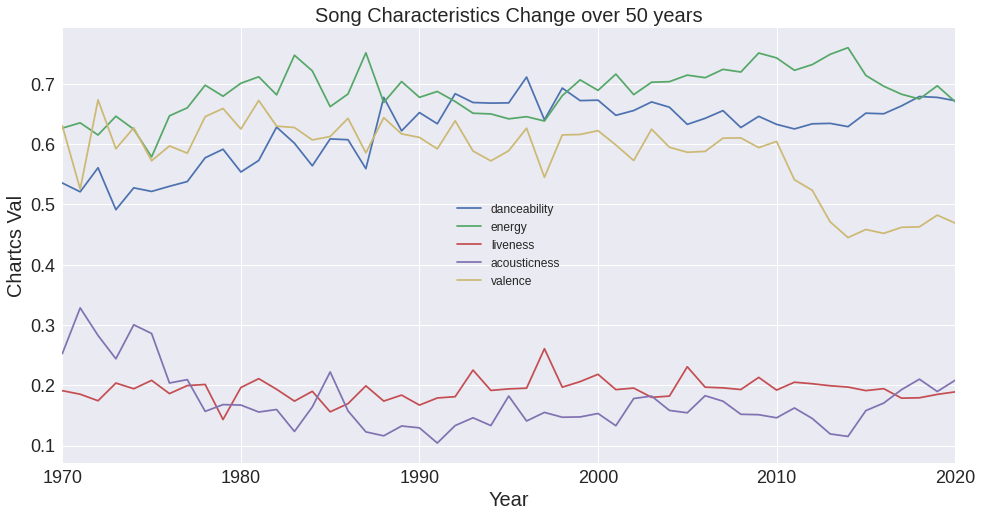

In [26]:
# Plotting
spotify_data_plot_function(song_chartcs, 'line', "Year", "Chartcs Val", "Song Characteristics Change over 50 years")